In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statistics as sts
from networkx.algorithms import isomorphism
import itertools

In [15]:
def show_graph_stats(G):
    triangles = nx.triangles(G).values()
    degrees = dict(nx.degree(G)).values()
    number_of_nodes = G.number_of_nodes()

    try:
        average_clustering = nx.average_clustering(G)
    except:
        average_clustering = 0

    # try catch for core
    try:
        core = nx.core_number(G)
    except:
        core = 0

    print("Nodes: ", 
          number_of_nodes)
    print("Edges: ", 
          G.number_of_edges())
    print("Density: ", 
          nx.density(G))
    print("Max degree: ", 
          max(degrees))
    print("Min degree: ", 
          min(degrees))
    print("Average degree: ", 
          sts.mean(degrees))
    print("Assortativity: ", 
          nx.degree_assortativity_coefficient(G))
    print("Number of triangles: ", 
          sum(triangles) / 3)
    print("Average number of triangles: ", 
          average_clustering * number_of_nodes)
    print("Average clustering: ", 
          average_clustering)
    print("Maximum number of triangles: ", 
          max(triangles))
    print("Average clustering coefficient: ", 
          average_clustering)
    print("Fraction of closed triangles: ", 
          nx.transitivity(G))
    print("Maximum k-core: ", 
          max(core.values()))

In [16]:
def find_subgraphs_of_size_n(graph, n):
    subgraphs = []

    for nodes in itertools.combinations(graph.nodes(), n):
        subgraph = graph.subgraph(nodes)

        # if len(subgraph) == n and nx.is_connected(subgraph):
        #     subgraphs.append(subgraph)
        subgraphs.append(subgraph)

    return subgraphs

In [17]:
graph_file = open("../data/tests/c.edges", "r")
graph1 = nx.read_weighted_edgelist(graph_file)
graph1.remove_edges_from(list(nx.selfloop_edges(graph1)))
graph_file.close()

In [18]:
graph_file = open("../data/tests/d.edges", "r")
graph2 = nx.read_weighted_edgelist(graph_file)
graph2.remove_edges_from(list(nx.selfloop_edges(graph2)))
graph_file.close()

In [19]:
show_graph_stats(graph1)

Nodes:  9
Edges:  12
Density:  0.3333333333333333
Max degree:  4
Min degree:  2
Average degree:  2.6666666666666665
Assortativity:  -0.05882352941176437
Number of triangles:  0.0
Average number of triangles:  0.0
Average clustering:  0.0
Maximum number of triangles:  0
Average clustering coefficient:  0.0
Fraction of closed triangles:  0
Maximum k-core:  2


In [20]:
show_graph_stats(graph2)

Nodes:  6
Edges:  7
Density:  0.4666666666666667
Max degree:  3
Min degree:  2
Average degree:  2.3333333333333335
Assortativity:  -0.16666666666666508
Number of triangles:  0.0
Average number of triangles:  0.0
Average clustering:  0.0
Maximum number of triangles:  0
Average clustering coefficient:  0.0
Fraction of closed triangles:  0
Maximum k-core:  2


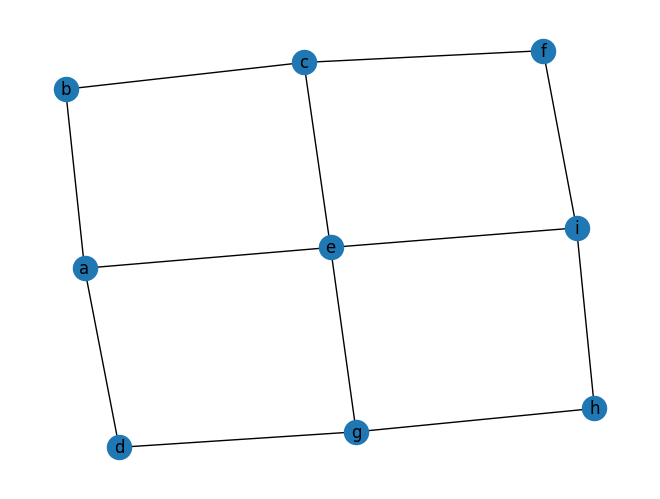

In [21]:
# plot graph1
nx.draw(graph1, with_labels=True)
plt.show()

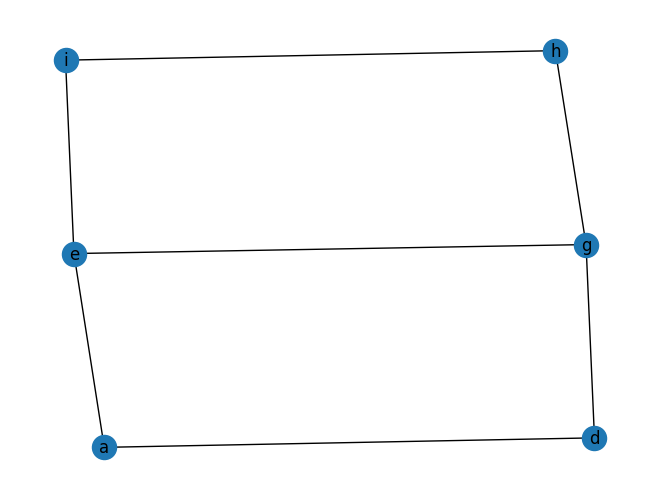

In [22]:
# plot graph2
nx.draw(graph2, with_labels=True)
plt.show()

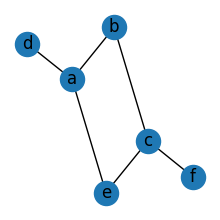

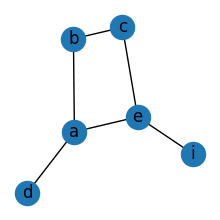

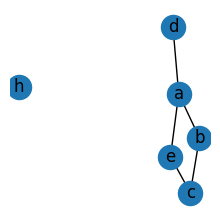

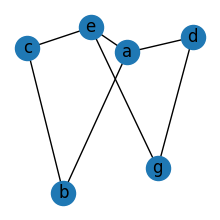

Subgraph 3 is isomorphic to graph2


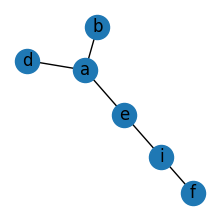

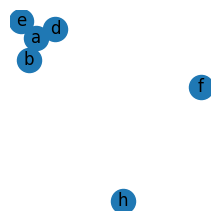

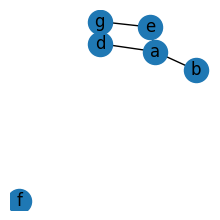

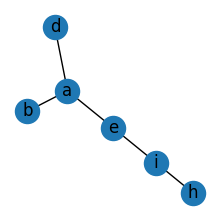

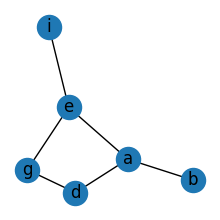

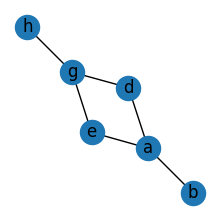

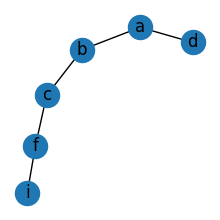

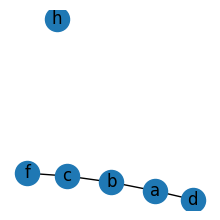

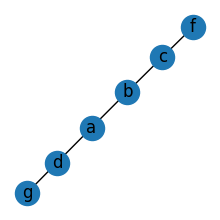

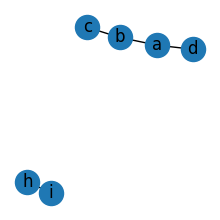

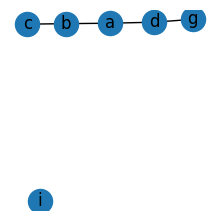

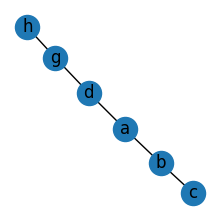

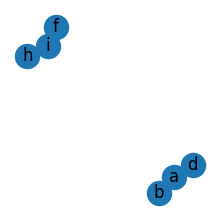

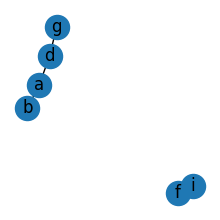

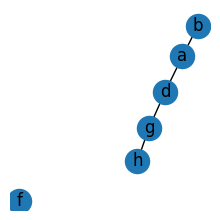

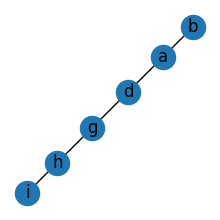

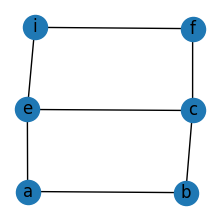

Subgraph 20 is isomorphic to graph2


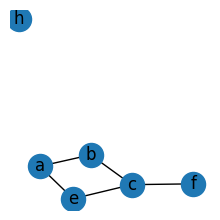

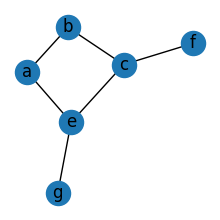

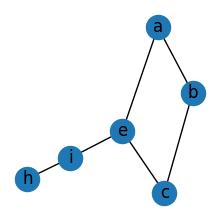

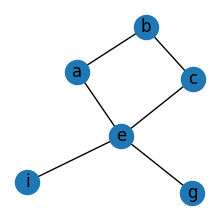

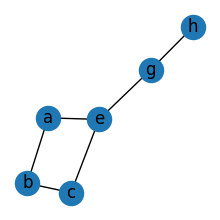

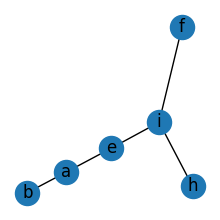

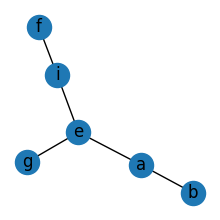

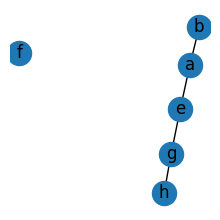

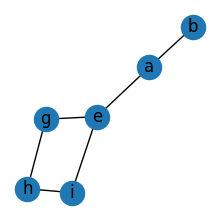

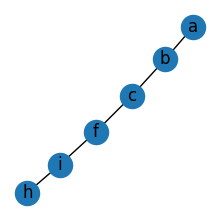

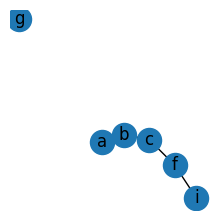

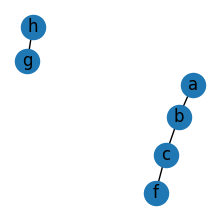

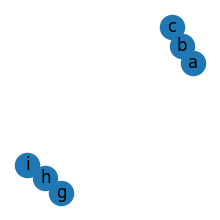

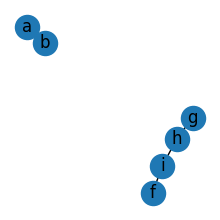

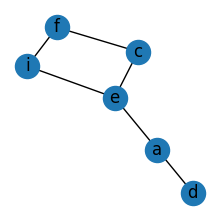

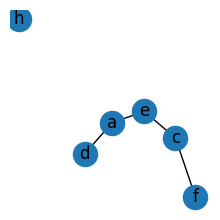

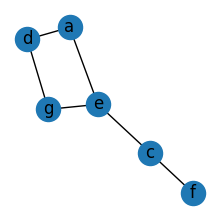

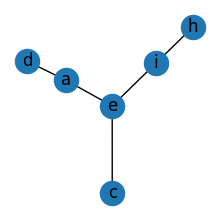

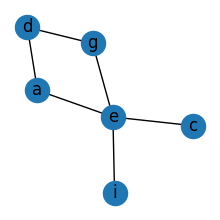

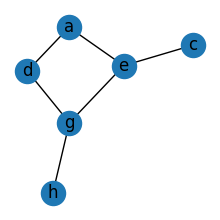

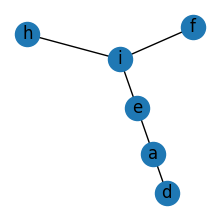

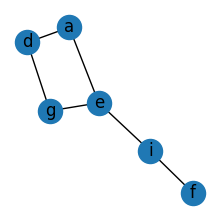

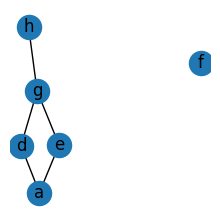

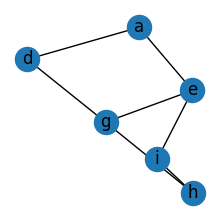

Subgraph 44 is isomorphic to graph2


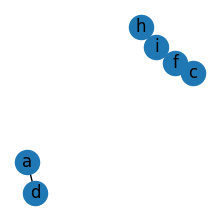

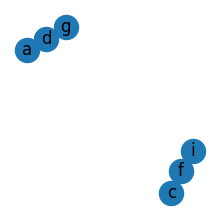

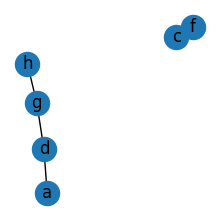

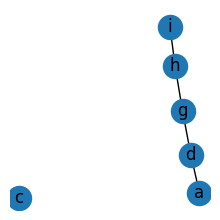

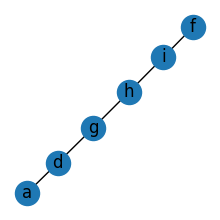

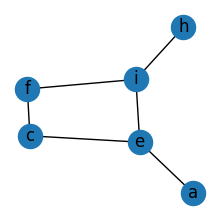

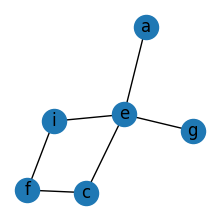

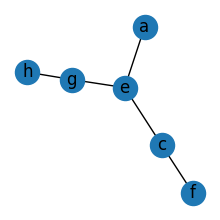

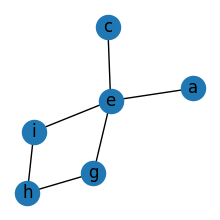

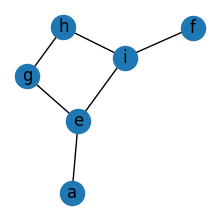

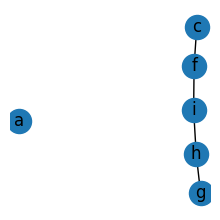

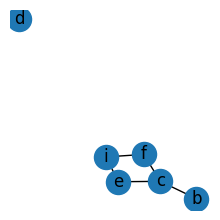

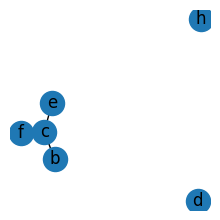

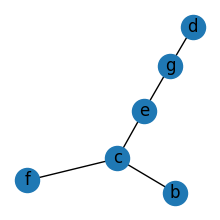

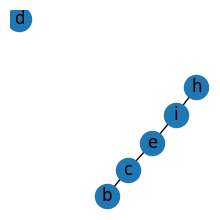

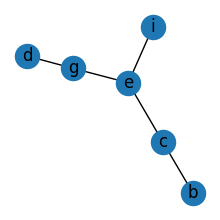

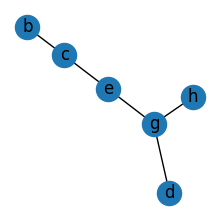

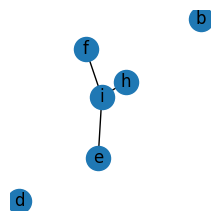

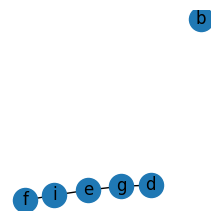

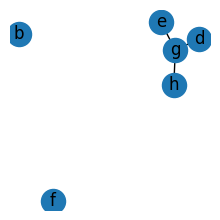

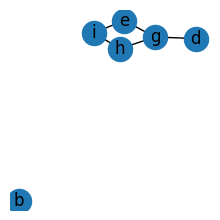

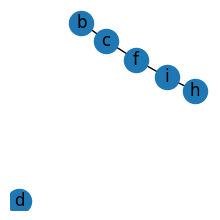

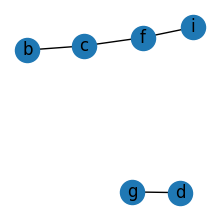

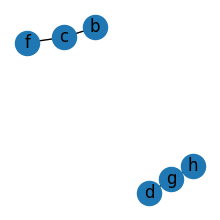

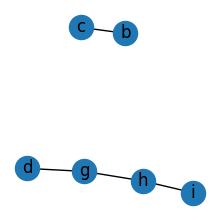

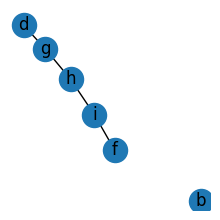

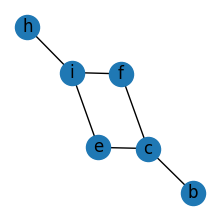

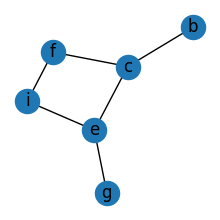

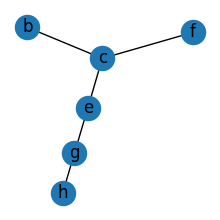

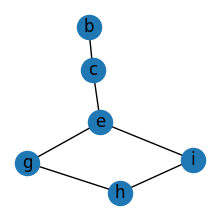

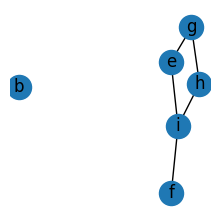

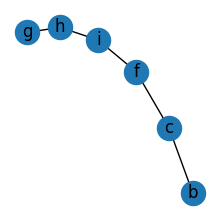

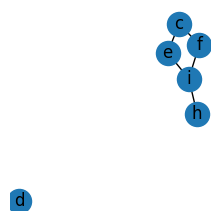

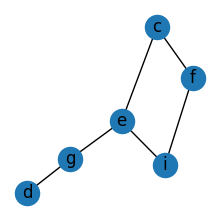

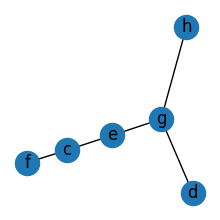

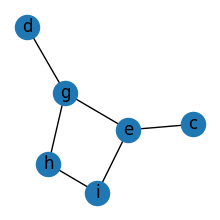

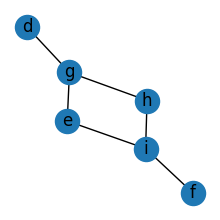

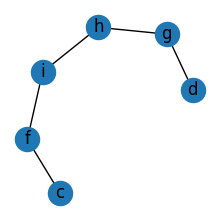

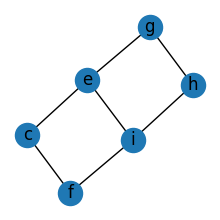

Subgraph 83 is isomorphic to graph2


In [23]:
subgraphs = find_subgraphs_of_size_n(graph1, graph2.number_of_nodes())

# plot the subgraphs
for i, subgraph in enumerate(subgraphs):
    plt.figure(figsize=(2, 2))
    nx.draw(subgraph, with_labels=True)
    plt.show()
    if nx.is_isomorphic(subgraph, graph2):
        print("Subgraph", i, "is isomorphic to graph2")

In [24]:
def subgraph_count(graph, subgraph):
    count = 0
    subgraphs = find_subgraphs_of_size_n(graph, subgraph.number_of_nodes())

    for sg in subgraphs:
        if nx.is_isomorphic(sg, graph2):
            count += 1

    return count

In [25]:
def subgraph_count2(graph, subgraph):
    count = 0

    for nodes in itertools.combinations(graph.nodes(), subgraph.number_of_nodes()):
        g = graph.subgraph(nodes)

        if nx.is_isomorphic(g, subgraph):
            count += 1
    
    return count

In [26]:
print(subgraph_count(graph1, graph2))
print(subgraph_count2(graph1, graph2))

4
4
